In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./_info.csv')
df = df.dropna()
print('report count:', len(df),', family count:', df['Family'].unique())
df.head(3)

report count: 19 , family count: ['dofloo' 'xorddos' 'Luabot']


,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys
0,dofloo,"D1,1",news,Dofloo-BleepingComputer,bleepingcomputer.com,Exposed Docker APIs Abused by DDoS,0.0,55.0,0.0,6.0,0.0,284.0,0.0,9.0,0.000000,0.000000,0.000000,0.000000
1,dofloo,"D1,2",analysis,Dofloo-MalwareMustDie,blog.malwaremustdie.org,Reversing an ARM arch ELF,2.0,55.0,0.0,6.0,0.0,284.0,0.0,9.0,0.036364,0.000000,0.000000,0.036364
2,dofloo,"D1,4",analysis,Dofloo-SyscallParty,blog.syscall.party,Analysing the new Linux_AES.DDoS IoT malware,6.0,55.0,2.0,6.0,8.0,284.0,3.0,9.0,0.109091,0.333333,0.028169,0.109091


### Plot completeness of object (IoC-like) in CTI documents
- scale min-max object count into [0,1]

Text(0.5, 0, 'Number of document')

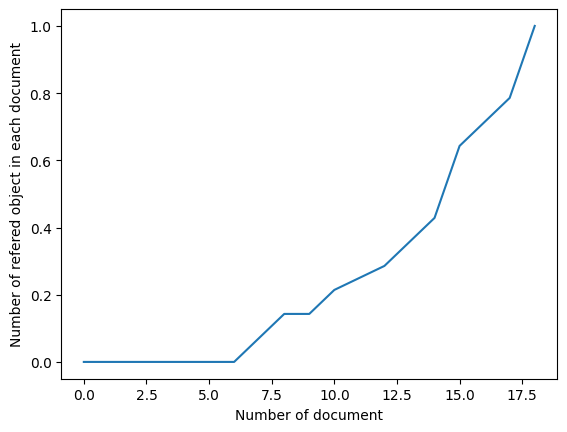

In [20]:
max = df['objN'].max()
min = df['objN'].min()

ioc_counts = df['objN']/max
ioc_counts = ioc_counts.sort_values()
ioc_counts = ioc_counts.to_list()

plt.plot(ioc_counts)
plt.ylabel("Percentage of refered object in each document") # y label
plt.xlabel("Number of document") # x label

- 雙座標 (百分比和個數)
- 四分位數 (ing)

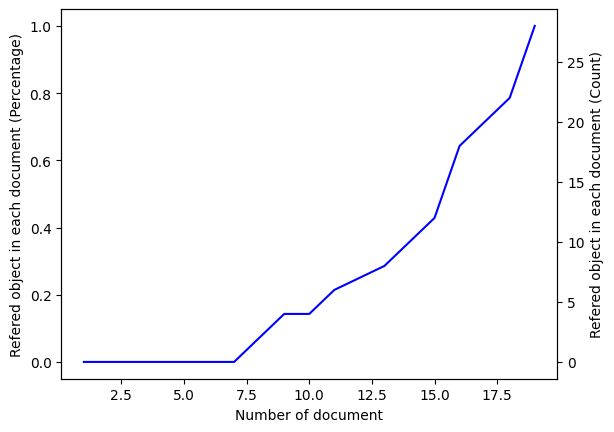

In [36]:
max = df['objN'].max()
min = df['objN'].min()

ioc_counts = df['objN']
ioc_percent = ioc_counts/max
ioc_percent = ioc_percent.sort_values()
ioc_percent = ioc_percent.to_list()
ioc_counts = sorted(ioc_counts.to_list())

x_data = list(range(1, len(ioc_percent)+1))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x_data, ioc_percent, 'w-') # hide the first line 兩條線畫起來趨勢一樣
ax2.plot(x_data, ioc_counts, 'b-')

ax1.set_xlabel('Number of document')
ax1.set_ylabel('Refered object in each document (Percentage)', color='black')
ax2.set_ylabel('Refered object in each document (Count)', color='black')

plt.show()